In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
data_train=pd.read_csv("C:\\Users\\hp\\Downloads\\hackathon\\train.csv")
data_test =pd.read_csv("C:\\Users\\hp\\Downloads\\hackathon\\test.csv")

In [3]:
data_train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
data_train=data_train.drop("INCIDENT_ID", axis=1)
data_train.head()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              23856 non-null  object 
 1   X_1               23856 non-null  int64  
 2   X_2               23856 non-null  int64  
 3   X_3               23856 non-null  int64  
 4   X_4               23856 non-null  int64  
 5   X_5               23856 non-null  int64  
 6   X_6               23856 non-null  int64  
 7   X_7               23856 non-null  int64  
 8   X_8               23856 non-null  int64  
 9   X_9               23856 non-null  int64  
 10  X_10              23856 non-null  int64  
 11  X_11              23856 non-null  int64  
 12  X_12              23674 non-null  float64
 13  X_13              23856 non-null  int64  
 14  X_14              23856 non-null  int64  
 15  X_15              23856 non-null  int64  
 16  MULTIPLE_OFFENSE  23856 non-null  int64 

In [6]:
data_train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [7]:
#Detecting outliers
outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
for i in data_train.drop('DATE',axis=1).columns:
    q1=data_train[i].quantile(0.25)
    q3=data_train[i].quantile(0.75)
    iqr=q3-q1
    
    fl=q1-(iqr*1.5)
    fh=q1+(iqr*1.5)
    outliers = outliers.append({'Feature':i,'Number of Outliers':data_train.loc[(data_train[i] < fl) | (data_train[i] > fh)].shape[0]},ignore_index=True)
    

outliers

,Feature,Number of Outliers
0,X_1,4820
1,X_2,122
2,X_3,1209
3,X_4,2602
4,X_5,0
5,X_6,3779
6,X_7,3802
7,X_8,4072
8,X_9,3785
9,X_10,3658


In [8]:
#missing value analysis
for i in data_train.columns:
    print (i,data_train[i].isnull().sum(),data_train[i].isnull().sum()*100/data_train[i].isnull().count())

DATE 0 0.0
X_1 0 0.0
X_2 0 0.0
X_3 0 0.0
X_4 0 0.0
X_5 0 0.0
X_6 0 0.0
X_7 0 0.0
X_8 0 0.0
X_9 0 0.0
X_10 0 0.0
X_11 0 0.0
X_12 182 0.7629107981220657
X_13 0 0.0
X_14 0 0.0
X_15 0 0.0
MULTIPLE_OFFENSE 0 0.0


In [9]:
#imputation
data_train['X_12'].fillna(data_train['X_12'].median(),inplace=True)
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              23856 non-null  object 
 1   X_1               23856 non-null  int64  
 2   X_2               23856 non-null  int64  
 3   X_3               23856 non-null  int64  
 4   X_4               23856 non-null  int64  
 5   X_5               23856 non-null  int64  
 6   X_6               23856 non-null  int64  
 7   X_7               23856 non-null  int64  
 8   X_8               23856 non-null  int64  
 9   X_9               23856 non-null  int64  
 10  X_10              23856 non-null  int64  
 11  X_11              23856 non-null  int64  
 12  X_12              23856 non-null  float64
 13  X_13              23856 non-null  int64  
 14  X_14              23856 non-null  int64  
 15  X_15              23856 non-null  int64  
 16  MULTIPLE_OFFENSE  23856 non-null  int64 

In [10]:
#fetaures and target separation
df_y=data_train['MULTIPLE_OFFENSE']
df_x=data_train.drop('MULTIPLE_OFFENSE',axis=1)


In [11]:
#class imbalance
imb=df_y.value_counts()*100/df_y.value_counts().sum()
print(imb)

1    95.523139
0     4.476861
Name: MULTIPLE_OFFENSE, dtype: float64


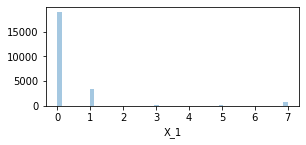

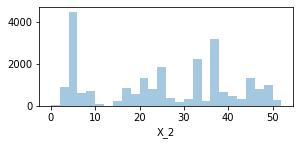

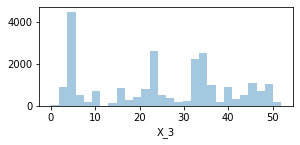

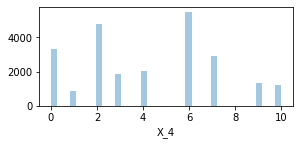

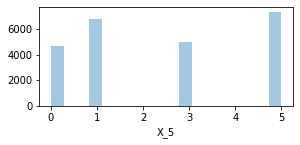

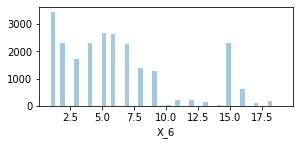

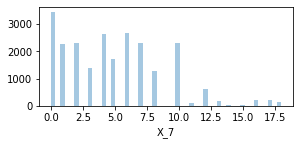

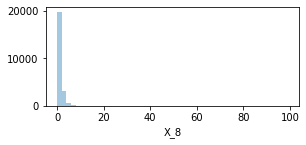

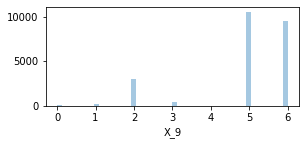

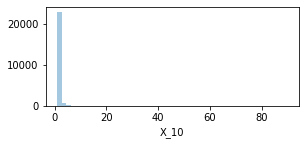

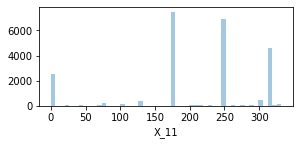

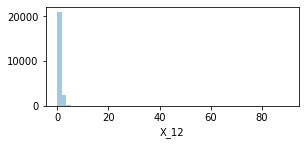

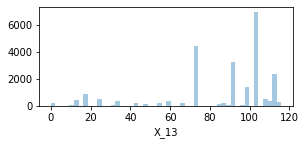

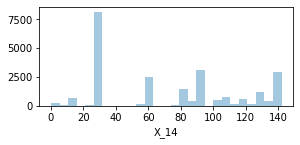

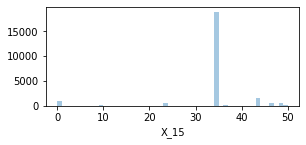

In [12]:
for i in df_x.columns:
    if i!= 'DATE':
        plt.figure(figsize=(10,4))
        plt.subplot(222)
        sns.distplot(df_x[i], kde=False)

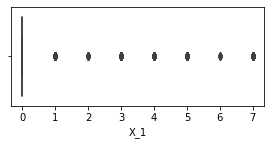

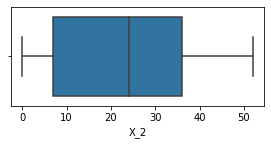

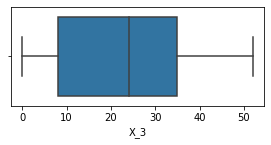

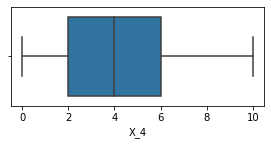

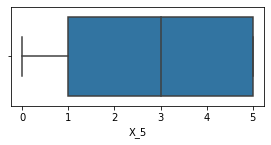

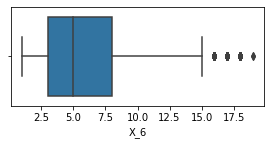

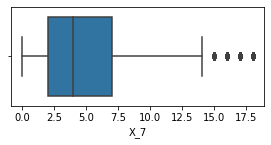

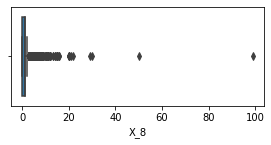

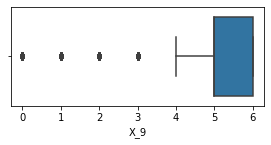

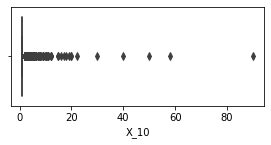

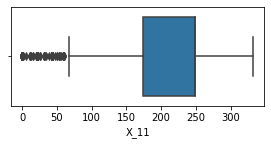

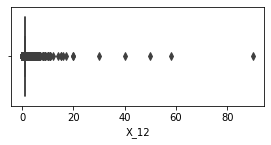

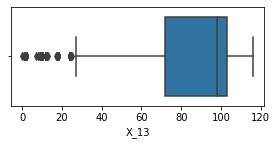

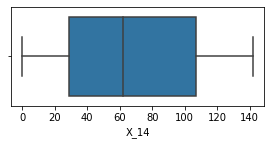

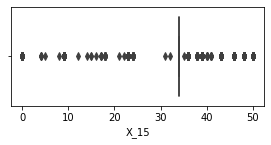

In [13]:
for i in df_x.columns:
    if i!= 'DATE':
        plt.figure(figsize=(10,4))
        plt.subplot(222)
        sns.boxplot(df_x[i])

In [14]:
df_x['month']=pd.to_datetime(df_x['DATE']).dt.month
df_x['wday']=pd.to_datetime(df_x['DATE']).dt.dayofweek

In [15]:
df_x=df_x.drop('DATE',axis=1)
df_x.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,month,wday
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,7,6
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,7,1
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,3,2
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,2,4
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,4,2


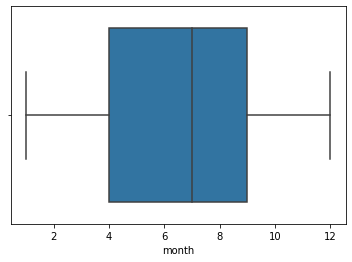

In [16]:
sns.boxplot(df_x['month'])

In [17]:
import statsmodels.api as sm

In [18]:
clf=sm.Logit(df_y,df_x)
clf.fit().summary()

Optimization terminated successfully.
         Current function value: 0.153474
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       MULTIPLE_OFFENSE   No. Observations:                23856
Model:                          Logit   Df Residuals:                    23839
Method:                           MLE   Df Model:                           16
Date:                Mon, 03 Aug 2020   Pseudo R-squ.:                  0.1605
Time:                        12:19:39   Log-Likelihood:                -3661.3
converged:                       True   LL-Null:                       -4361.2
Covariance Type:            nonrobust   LLR p-value:                1.751e-288
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X_1            0.0913      0.033      2.809      0.005       0.028       0.155
X_2           -0.0528      0.031     -1.687      0.092      -0.114       0.009
X_3            0.0553      0.032      1.748      0.080      -0.007       0.117
X_4            0.0327      0.014      2.364      0.018       0.006       0.060
X_5            0.0416      0.021      2.029      0.042       0.001       0.082
X_6            0.0248      0.011      2.256      0.024       0.003       0.046
X_7           -0.0146      0.012     -1.170      0.242      -0.039       0.010
X_8            0.0351      0.026      1.364      0.173      -0.015       0.086
X_9            0.2018      0.021      9.822      0.000       0.162       0.242
X_10          -1.5826      0.056    -28.384      0.000      -1.692      -1.473
X_11           0.0055      0.000     16.469      0.000       0.005       0.006
X_12           0.9562      0.051     18.682      0.000       0.856       1.057
X_13           0.0059      0.001      5.854      0.000       0.004       0.008
X_14           0.0036      0.001      4.924      0.000       0.002       0.005
X_15           0.0250      0.002     10.050      0.000       0.020       0.030
month          0.0474      0.010      4.845      0.000       0.028       0.067
wday           0.0281      0.016      1.726      0.084      -0.004       0.060
==============================================================================
"""

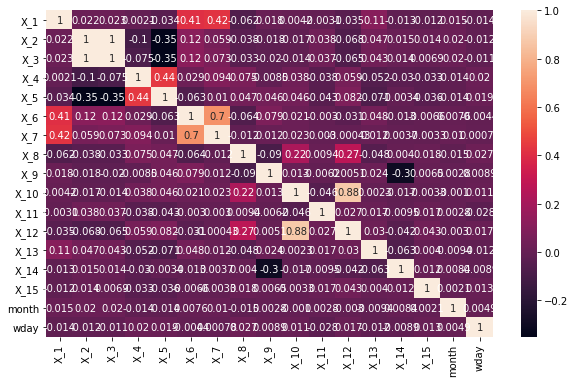

In [19]:
#X_4, X_5, X_8,X_9,X_10,X_11,X_13,X_14,MONTH,WDAY IMPORTANT VARIABLES
plt.figure(figsize=(10,6))
sns.heatmap(df_x.corr(),annot=True)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [21]:
train_x,test_x,train_y, test_y =train_test_split(df_x,df_y,test_size=0.3,random_state=42)
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
predict=rfc.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)

0.9518069136306773


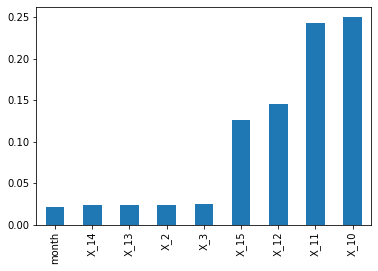

In [22]:
rfc_imp=pd.Series(rfc.feature_importances_,index=df_x.columns).sort_values().tail(9)
rfc_imp.plot(kind='bar')
plt.show()

In [23]:
#removing less impprtant features
df_x1=df_x.drop(['X_2','X_4','X_5','X_8','X_9'],axis=1)
df_y1=df_y
train_x,test_x,train_y, test_y =train_test_split(df_x1,df_y1,test_size=0.3,random_state=42)
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
predict=rfc.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)

0.9602089662743496


In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_y, predict))
print(confusion_matrix(test_y, predict))
#visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       345
           1       1.00      1.00      1.00      6812

    accuracy                           0.99      7157
   macro avg       0.98      0.96      0.97      7157
weighted avg       0.99      0.99      0.99      7157

[[ 318   27]
 [   9 6803]]


In [25]:
from xgboost import XGBClassifier 

In [26]:

clf=XGBClassifier ()
clf.fit(train_x,train_y)
predict=clf.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)

0.9881855974537688


In [27]:
from sklearn.ensemble import GradientBoostingClassifier 

In [28]:
clf=GradientBoostingClassifier ()
clf.fit(train_x,train_y)
predict=clf.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)

0.9898550724637681


In [29]:
from sklearn.linear_model import LogisticRegression


In [30]:
clf=LogisticRegression()
clf.fit(train_x,train_y)
predict=clf.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)

0.5509807926336303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
#testing df_x

In [32]:
train_x,test_x,train_y, test_y =train_test_split(df_x,df_y,test_size=0.3,random_state=42)
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
predict=rfc.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)

0.9501374386206779


In [33]:
clf=XGBClassifier()
clf.fit(train_x,train_y)
predict=clf.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)

0.9881855974537688


In [34]:
clf=GradientBoostingClassifier ()
clf.fit(train_x,train_y)
predict=clf.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)

0.9913043478260869


In [35]:
clf=LogisticRegression()
clf.fit(train_x,train_y)
predict=clf.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)

0.5441748151173973


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
#PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca=PCA(n_components=2)
pca.fit(df_x1)
df_x1=pca.transform(df_x1)

In [39]:
train_x,test_x,train_y, test_y =train_test_split(df_x1,df_y1,test_size=0.3,random_state=42)
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
predict=rfc.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)

0.8787559464542538


In [40]:
clf=XGBClassifier()
clf.fit(train_x,train_y)
predict=clf.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)

0.8317372582058942


In [41]:
#decrease in the accuracy after pca

In [42]:
'''def grid_search_random_forrest_best(dataframe,target):
    
    # splitting the data
    x_train,x_test,y_train,y_test = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE(random_state=42)
    
    X_sm, y_sm =  smote.fit_resample(x_train, y_train)
    
    rfc = RandomForestClassifier()
    
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    #visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forrest_best(df_x1,df_y1)
'''

'def grid_search_random_forrest_best(dataframe,target):\n    \n    # splitting the data\n    x_train,x_test,y_train,y_test = train_test_split(dataframe,target, test_size=0.3, random_state=42)\n    \n    # Applying Smote on train data for dealing with class imbalance\n    smote = SMOTE(random_state=42)\n    \n    X_sm, y_sm =  smote.fit_resample(x_train, y_train)\n    \n    rfc = RandomForestClassifier()\n    \n    rfc.fit(X_sm, y_sm)\n    y_pred = rfc.predict(x_test)\n    print(classification_report(y_test, y_pred))\n    print(confusion_matrix(y_test, y_pred))\n    #visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)\n\n\ngrid_search_random_forrest_best(df_x1,df_y1)\n'

In [43]:
#standardization

In [44]:
from sklearn import preprocessing

In [45]:
scaler=preprocessing.StandardScaler()
data_train['month']=pd.to_datetime(data_train['DATE']).dt.month
data_train['wday']=pd.to_datetime(data_train['DATE']).dt.dayofweek
df=data_train.drop('DATE',axis=1)


In [46]:
data_train.head()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,month,wday
0,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,7,6
1,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,7,1
2,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,3,2
3,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,2,4
4,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,4,2


In [47]:
df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,month,wday
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,7,6
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,7,1
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,3,2
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,2,4
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,4,2


In [48]:
y=df['MULTIPLE_OFFENSE']
stand_df=scaler.fit_transform(df.drop('MULTIPLE_OFFENSE',axis=1))
stand_df=pd.DataFrame(stand_df,index=df.drop('MULTIPLE_OFFENSE',axis=1).index,columns=df.drop('MULTIPLE_OFFENSE',axis=1).columns)
stand_df['OFFENSE']=y


In [49]:
stand_df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,month,wday,OFFENSE
0,-0.336025,0.735489,0.618612,-0.773190,-0.741502,-0.258109,0.289422,0.018953,0.789575,-0.218714,-0.354230,0.022126,0.245052,-1.008728,0.302296,0.149118,1.513553,0
1,0.358561,0.801107,0.816831,-1.452397,-1.250913,1.083674,3.123123,0.018953,0.789575,-0.218714,0.312212,0.022126,0.643651,1.601188,0.063822,0.149118,-0.992681,1
2,-0.336025,-1.429877,-1.495724,-0.433587,1.296140,-1.152631,-1.256233,0.707130,-1.412105,-0.218714,-0.354230,0.022126,0.897305,0.469455,0.063822,-1.065309,-0.491435,1
3,-0.336025,0.538638,0.486466,-0.773190,-0.741502,0.189152,-0.998624,0.018953,0.789575,-0.218714,0.451949,0.022126,-0.479674,-1.008728,0.063822,-1.368916,0.511059,1
4,-0.336025,0.538638,0.486466,-0.773190,-0.741502,0.412783,-0.483406,-0.669225,0.055682,-0.218714,-0.354230,-0.837542,0.969778,-1.008728,1.136955,-0.761702,-0.491435,1


In [50]:
stand_x=stand_df.drop(['OFFENSE','X_1','X_5','X_9','wday','X_7','X_4'],axis=1)
stand_y=stand_df['OFFENSE']

0.9776002706221757


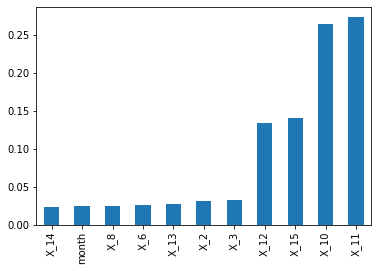

In [51]:
train_x,test_x,train_y,test_y = train_test_split(stand_x,stand_y, test_size=0.3, random_state=42)
# selecting the classifier
rfc = RandomForestClassifier()
rfc.fit(train_x,train_y)
predict=rfc.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)
rfc_imp=pd.Series(rfc.feature_importances_,index=stand_x.columns).sort_values().tail(20)
rfc_imp.plot(kind='bar')
plt.show()

In [52]:
print(classification_report(test_y, predict))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       345
           1       1.00      1.00      1.00      6812

    accuracy                           1.00      7157
   macro avg       0.99      0.98      0.98      7157
weighted avg       1.00      1.00      1.00      7157



In [53]:
rfc = XGBClassifier()
rfc.fit(train_x,train_y)
predict=rfc.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)
print(classification_report(test_y, predict))

0.9881855974537688
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       345
           1       1.00      1.00      1.00      6812

    accuracy                           1.00      7157
   macro avg       1.00      0.99      0.99      7157
weighted avg       1.00      1.00      1.00      7157



In [54]:
rfc = GradientBoostingClassifier()
rfc.fit(train_x,train_y)
predict=rfc.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)
print(classification_report(test_y, predict))

0.9898550724637681
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       345
           1       1.00      1.00      1.00      6812

    accuracy                           1.00      7157
   macro avg       1.00      0.99      0.99      7157
weighted avg       1.00      1.00      1.00      7157



In [55]:
#Normalization
scaler=preprocessing.Normalizer()
norm_df=scaler.fit_transform(df.drop('MULTIPLE_OFFENSE',axis=1))
norm_df=pd.DataFrame(stand_df,index=df.drop('MULTIPLE_OFFENSE',axis=1).index,columns=df.drop('MULTIPLE_OFFENSE',axis=1).columns)
norm_df['OFFENSE']=y

In [56]:
norm_x=norm_df.drop(['OFFENSE','X_1','X_5','X_9','wday','X_7','X_4'],axis=1)
norm_y=norm_df['OFFENSE']

In [57]:
train_x,test_x,train_y,test_y = train_test_split(norm_x,norm_y, test_size=0.3, random_state=42)
# selecting the classifier
rfc = RandomForestClassifier()
rfc.fit(train_x,train_y)
predict=rfc.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)


0.9747017198975381


In [58]:
print(classification_report(test_y, predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       345
           1       1.00      1.00      1.00      6812

    accuracy                           1.00      7157
   macro avg       0.99      0.97      0.98      7157
weighted avg       1.00      1.00      1.00      7157



In [59]:
rfc = XGBClassifier()
rfc.fit(train_x,train_y)
predict=rfc.predict(test_x)
auc=roc_auc_score(test_y,predict)
print(auc)
print(classification_report(test_y, predict))

0.9881855974537688
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       345
           1       1.00      1.00      1.00      6812

    accuracy                           1.00      7157
   macro avg       1.00      0.99      0.99      7157
weighted avg       1.00      1.00      1.00      7157



In [60]:
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(train_x, train_y)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}


In [61]:
pred=grid_search_model.predict(test_x)
print(classification_report(test_y, pred))

auc=roc_auc_score(test_y,pred)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       345
           1       1.00      1.00      1.00      6812

    accuracy                           1.00      7157
   macro avg       1.00      0.99      1.00      7157
weighted avg       1.00      1.00      1.00      7157



In [62]:
print (auc)

0.9926802233058457
